## Assignment

Apply the non-unitary matrix $$\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}$$
on a 1-qubit quantum state which has a 0.3 probability of being measured in the zero state $|0\rangle$

### Applying a Non-Unitary Matrix to a Quantum State
In quantum mechanics, and by extension in quantum computing, the evolution of an isolated quantum system is described by unitary transformations. This requirement stems from the foundational principles of quantum mechanics, particularly the need to preserve the norm of quantum states and the probabilistic interpretation of these states.

In order to apply non-unitary operations to a quantum system, several techniques are used. One of these is The Linear Combination of Unitaries (LCU).

The Linear Combination of Unitaries (LCU) technique is an advanced method for implementing non-unitary transformations within quantum circuits by expressing the desired non-unitary operation as a linear combination of unitary operations. This technique is particularly useful for quantum algorithms where non-unitary operations need to be simulated, and it allows for the implementation of complex mathematical functions that are otherwise challenging to achieve directly with standard quantum gates.



The LCU method is based on the idea that any operator $A$ can be expressed as a linear combination of unitary operators $U_i$, with coefficients $\alpha_i$:
$$ A = \sum_{i=0}^{2^n-1} \alpha_i U_i $$


Our non-unitary matrix is a 2x2 matrix, so can be expressed as a linear combination of Pauli matrices(X,Y,X) and the identity matrix (I). This is called **Pauli Decomposition** of Operators.

The general form of any 2x2 matrix $A$ decomposed into Pauli matrices and the identity matrix is given by:
$$A=aI+bX+cY+dZ$$, where $a,b,c$ and $d$ are coefficients that can be determined from A. These coefficients are calculated using:
$$a = \frac{1}{2} \text{Tr}(AI), \quad b = \frac{1}{2} \text{Tr}(AX), \quad c = \frac{1}{2} \text{Tr}(AY), \quad d = \frac{1}{2} \text{Tr}(AZ)$$
Let's calculate each of these for the given matrix $$ A =\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}$$
Calculating these coefficients:
$$ a = \frac{1}{2} \text{Tr}\left(\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix}\right) = \frac{1}{2}(1 + 0) = \frac{1}{2}$$
$$ b = \frac{1}{2} \text{Tr}\left(\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}\right) = \frac{1}{2}(0 + 0) = 0$$
$$c = \frac{1}{2} \text{Tr}\left(\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}\right) = \frac{1}{2}(0 + 0) = 0 $$
$$ d = \frac{1}{2} \text{Tr}\left(\begin{pmatrix} 1 & 0 \\ 0 & 0 \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\right) = \frac{1}{2}(1 + 0) = \frac{1}{2}$$

Thus, the Pauli decomposition of \( A \) is:
$$A = \frac{1}{2}I + 0X + 0Y + \frac{1}{2}Z = \frac{1}{2}(I + Z) = \frac{1}{2}\left(\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} + \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}\right)$$

Let's use the pennylane library to check our calculations.

In [1]:
import numpy as np
import pennylane as qml

A = np.array(
    [[1,0],
     [0,0]]
)

LCU = qml.pauli_decompose(A)
LCU_coeffs, LCU_ops = LCU.terms()

print(f"LCU decomposition:\n {LCU}")
print(f"Coefficients:\n {LCU_coeffs}")
print(f"Unitaries:\n {LCU_ops}")

LCU decomposition:
   (0.5) [I0]
+ (0.5) [Z0]
Coefficients:
 [0.5, 0.5]
Unitaries:
 [Identity(wires=[0]), PauliZ(wires=[0])]


We can see that the manual calculations agree with those of the pennylane library.

Linear Combination of Unitaries (LCU) Method

 STEP 1: **Define the Initial State**:
The initial state $ \psi\rangle$  of the qubit is given by the probability 0.3 of being measured in the state $|0\rangle$ and 0.7 in the state $|1\rangle$. Thus, the state vector $|\psi\rangle$ can be represented as:
$$ |\psi\rangle = \sqrt{0.3} |0\rangle + \sqrt{0.7} |1\rangle$$


 STEP 2: **Ancilla State Preparation** *PREPARE*:
 Prepare an ancilla qubit in a superposition state such that the amplitudes correspond to the square roots of the absolute values of the coefficients of the unitaries. For $\frac{1}{2}$ coefficients, prepare the ancilla in the state:
  $ |\psi_{ancilla}\rangle= \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
This can be achieved using a Hadamard gate on the ancilla qubit initially in the state $|0\rangle$.


STEP 3: **Controlled Unitary Operations** SELECT:
Apply the unitaries $I$ and 𝑍 controlled on the state of the ancilla qubit. This is done by setting up a control system where:
* When the ancilla is $∣0\rangle$, apply the identity matrix I (which does nothing).
* When the ancilla is $∣1\rangle$, apply the Pauli Z matrix.


STEP 4: **Adjoint of the State Preparation** PREPARE$^{-1}$:
n the scenario described where we used a Hadamard gate for state preparation, the adjoint of the Hadamard gate is the Hadamard gate itself (since H =H$^{\dagger}$). This is because the Hadamard gate is self-inverse.

In [3]:
from classiq import *
from classiq.execution import ExecutionPreferences


@qfunc
def lcu_controllers(controller: QNum, psi: QNum):
    control(ctrl=controller == 0, operand=lambda: apply_to_all(IDENTITY, psi))

    control(ctrl=controller == 1, operand=lambda: apply_to_all(Z,psi))


@qfunc
def main(controller: Output[QNum], psi: Output[QNum]):
    # Defining the error bound and probability distribution
    error_bound = 0.01
    controller_probabilities = [0.5, 0.5]
    # Allocating the target and control qubits, respectively
    allocate(1, psi)

    allocate(1, controller)
   
    # Preparing |psi> state - which has a 0.3 probability being measured in the zero state |0〉
    inplace_prepare_state(probabilities=[0.3,0.7], bound=error_bound, target=psi)
    
    # Executing the Within-Apply function, the SELECT function is defined by lcu_controllers and the PREPARE function is defined by the inplace_prepare_state function.
    within_apply(
        compute=lambda: hadamard_transform(controller),
        action=lambda: lcu_controllers(controller, psi),
    )


qmod = create_model(main)
qmod = set_execution_preferences(qmod, execution_preferences=ExecutionPreferences(num_shots=2048, job_name="6.10 - assignemt", random_seed=767))
qprog = synthesize(qmod)
show(qprog)

Opening: https://platform.classiq.io/circuit/cea1f8d2-8ad1-4c59-81f7-68d18db56daf?version=0.43.2


In [9]:
result = execute(qprog).result()
result

[TaggedExecutionDetails(value_type=<SavedResultValueType.ExecutionDetails: 'ExecutionDetails'>, name='result', value=ExecutionDetails(vendor_format_result={}, counts={'00': 596, '11': 1452}, counts_lsb_right=True, parsed_states={'00': {'controller': 0.0, 'psi': 0.0}, '11': {'controller': 1.0, 'psi': 1.0}}, histogram=None, output_qubits_map={'controller': (0,), 'psi': (1,)}, state_vector=None, parsed_state_vector_states=None, physical_qubits_map={'controller': (1,), 'psi': (0,)}, num_shots=2048))]

In [5]:
result[0].value.counts

{'00': 596, '11': 1452}

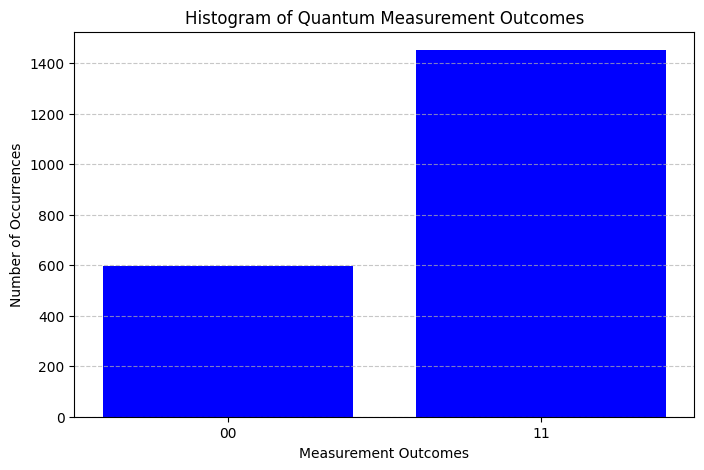

In [7]:
import matplotlib.pyplot as plt


# Labels and values for the histogram
labels = list(result[0].value.counts.keys())
values = [result[0].value.counts[label] for label in labels]

# Create the histogram
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'blue'])
plt.xlabel('Measurement Outcomes')
plt.ylabel('Number of Occurrences')
plt.title('Histogram of Quantum Measurement Outcomes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()